# **Import Necessary Libraries**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


# **Load the Dataset**

In [23]:
df=pd.read_csv("/content/sample_data/Titanic-Dataset.csv")



# **Data Preprocessing**

In [24]:
# Handling missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping irrelevant features
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.592481,1,0,-0.502445,True,False,True
1,2,1,1,0.638789,1,0,0.786845,False,False,False
2,3,1,3,-0.284663,0,0,-0.488854,False,False,True
3,4,1,1,0.407926,1,0,0.420730,False,False,True
4,5,0,3,0.407926,0,0,-0.486337,True,False,True


# **Split the Dataset**

In [25]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Building**

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **Model Evaluation**

Accuracy: 0.80


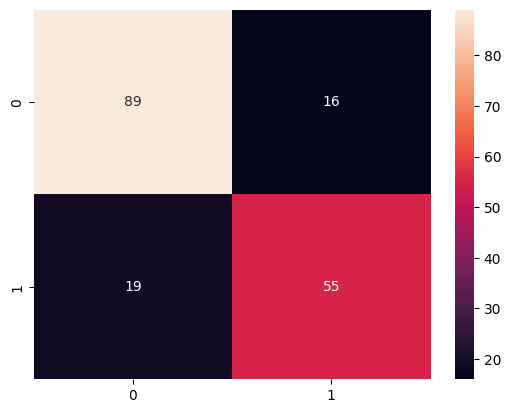

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [27]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
